In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['savefig.dpi'] = 300

import sys
sys.path.append("../mpi_scripts/")
from io_utils import collect_results
import os
plt.style.use('../../styles/general.mplstyle')

In [2]:
from loss_utils import calculate_loss

In [3]:
from pypoptim.losses import RMSE

In [4]:
art_data = pd.read_csv('../../data/training/art_data_right_j_pipette.csv')

In [5]:
sys.path.append('../pypoptim/mpi_scripts/')
from ina_model import InaModel

dirname = '../../src/model_ctypes/ina_pipette/'
filename_so = os.path.join(dirname, 'ina.so')

filename_so_abs = os.path.abspath(filename_so)
INA = InaModel(filename_so_abs)

In [6]:
legend_constants = pd.read_csv(os.path.join(dirname, "legend_constants.csv"), index_col='name')['value'] 
legend_states = pd.read_csv(os.path.join(dirname, "legend_states.csv"), index_col='name')['value'] 
legend_algebraic = pd.read_csv(os.path.join(dirname, "legend_algebraic.csv"), index_col='name')['value'] 

In [7]:
S = legend_states.copy()
C = legend_constants.copy()
A = legend_algebraic.copy()

In [8]:
df_protocol = pd.read_csv('../../data/protocols/protocol_trace.csv')
df_initial_state_protocol = pd.read_csv('../../data/protocols/protocol_initial_state.csv')

In [9]:
i = INA.run(A,S,C, df_protocol, df_initial_state_protocol)

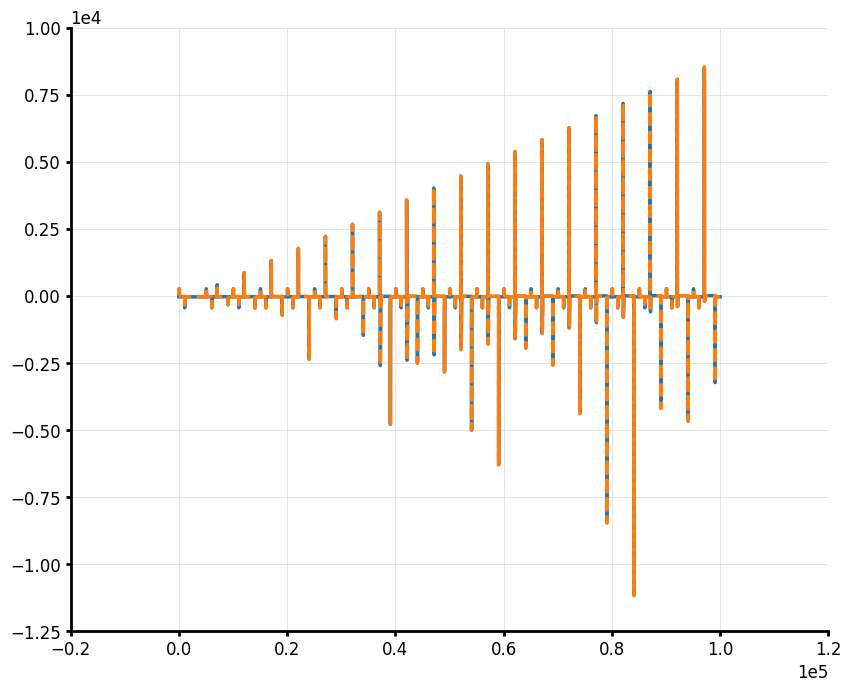

In [10]:
plt.plot(i.I_out)
plt.plot(art_data.I_out, "--")

# Load results

In [11]:
case = "210729_205319"
dirname_results = '../../results/ina_pipette/'
result = collect_results(case, dirname_results, dump_keys=['best', 'dump'])

In [12]:
config = result['config'].copy()
sol_best = result['sol_best'].copy()
phenotype_best = result['phenotype_best'].copy()
sol_best

ec_name  g_name     
common   c_p             0.856344
         c_m             1.340119
         a0_m            0.230524
         b0_m            8.232682
         delta_m         2.961568
         s_m             1.003738
         a0_h            1.153501
         b0_h            3.387604
         delta_h         1.920495
         s_h             0.546435
         a0_j            0.368656
         b0_j            0.430863
         delta_j         0.115069
         s_j             0.138986
         tau_j_const     0.175007
         R               0.445268
         R_f             6.289404
         g_max           2.553292
         g_leak          0.333868
         tau_z           0.395523
         v_half_m       23.921037
         v_half_h       85.393364
         k_m             5.111284
         k_h             3.477428
         x_c_comp        0.114182
         x_r_comp        0.994091
         alpha           0.741560
trace    v_off           3.092132
Name: 0, dtype: float64

In [102]:
dump_loss = result['dump']['dump']['loss'].reshape((-1, config['runtime']['n_organisms']))

In [109]:
config['runtime']['genes_dict']

{'common': {'c_p': {'bounds': [0.1, 10],
   'gamma': 0.004,
   'is_multiplier': True},
  'c_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  'a0_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  'b0_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  'delta_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  's_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  'a0_h': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  'b0_h': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  'delta_h': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  's_h': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  'a0_j': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  'b0_j': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  'delta_j': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
  's_j': {'bounds': [0.1, 10], 'gamma': 0.0

In [108]:
config['runtime']['legend']

{'states': name
 v_comp   -80.0
 v_p      -80.0
 v_m      -80.0
 m          0.0
 h          1.0
 j          1.0
 I_out      0.0
 Name: value, dtype: float64,
 'constants': name
 c_p            4.502963e-12
 c_m            2.473016e-11
 a0_m           2.736956e+03
 b0_m           7.135904e+01
 delta_m        2.061570e+01
 s_m            9.306083e+00
 a0_h           4.604052e-01
 b0_h           5.038082e+02
 delta_h        1.523480e+01
 s_h            2.196405e+01
 a0_j           4.475461e-01
 b0_j           2.061333e+04
 delta_j        4.115303e+00
 s_j            1.673159e+02
 tau_j_const    7.794313e-04
 R              2.494677e+07
 R_f            3.264214e+05
 g_max          4.392204e+05
 g_leak         4.812443e-01
 tau_z          1.000340e-04
 v_half_m       2.435802e+01
 v_half_h       5.969117e+01
 k_m            5.666770e+00
 k_h            5.507771e+00
 x_c_comp       9.929933e-02
 x_r_comp       1.020000e+00
 alpha          7.500000e-01
 v_off         -2.000000e+00
 v_rev     

In [106]:
dump_loss[0].reshape(config['runtime']['comm_size'], -1)

array([[1202.42341564,  679.16038143,  492.92755952,  198.25104473],
       [1202.42341564,  679.16038143,  492.92755952,  198.25104473],
       [1202.42341564,  679.16038143,  492.92755952,  198.25104473],
       [1202.42341564,  679.16038143,  492.92755952,  198.25104473]])

In [82]:
assert np.all(np.diff(loss))<=0

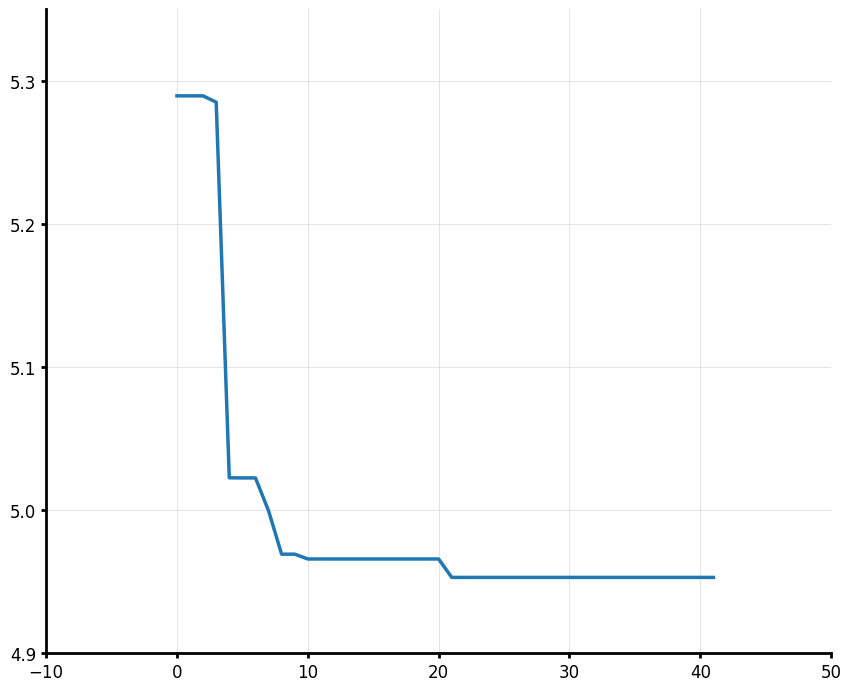

In [83]:
loss = result['dump']['best']['loss']
plt.plot(np.log(loss))
#plt.xlim(40, 100)

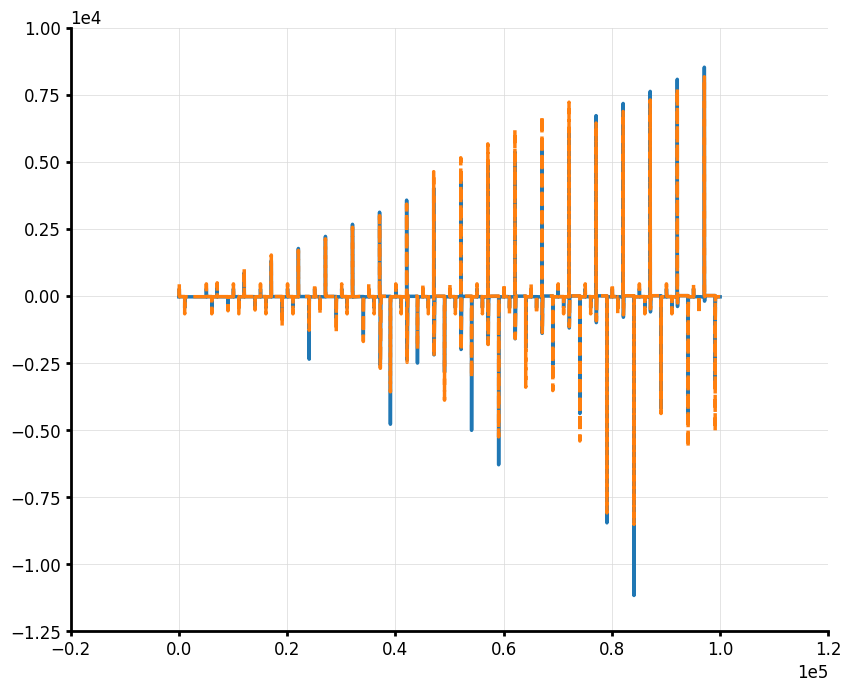

In [69]:
plt.plot(art_data.I_out)
best_phenotype = result['phenotype_best']['trace'].I_out
plt.plot(best_phenotype, "--")


In [43]:
# names of genes
m_index = config['runtime']['m_index']
dump_genes = result['dump']['dump']['genes'].reshape((-1, len(m_index)))
n_organisms = config['runtime']['n_organisms']
n_generations = len(dump_genes) // n_organisms
# multiindex (generation, numb_of_organism) 
index = pd.MultiIndex.from_product([range(n_generations), range(n_organisms)],
                                   names=['epoch', 'org'])

dump_genes = pd.DataFrame(dump_genes, columns=m_index, index=index)

dump_loss = result['dump']['dump']['loss'].reshape((n_generations, config['runtime']['n_organisms']))

In [44]:
epochs = []
for k in range(n_generations):
    for l in range(n_organisms):
        epochs.append(k)

No handles with labels found to put in legend.


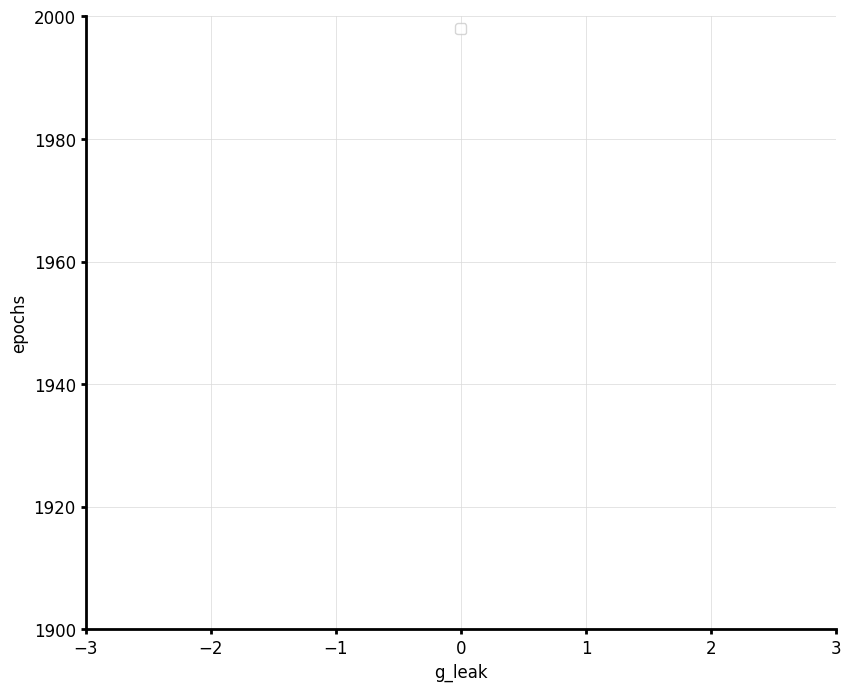

In [45]:
plt.plot(np.log(result['dump']['dump']['genes'][18::28]) , epochs, '.', alpha=0.1)
plt.plot()
plt.xlabel('g_leak')
plt.ylabel('epochs')
#plt.xlim(0,2)
plt.ylim(1900, 2000)
plt.legend()

No handles with labels found to put in legend.


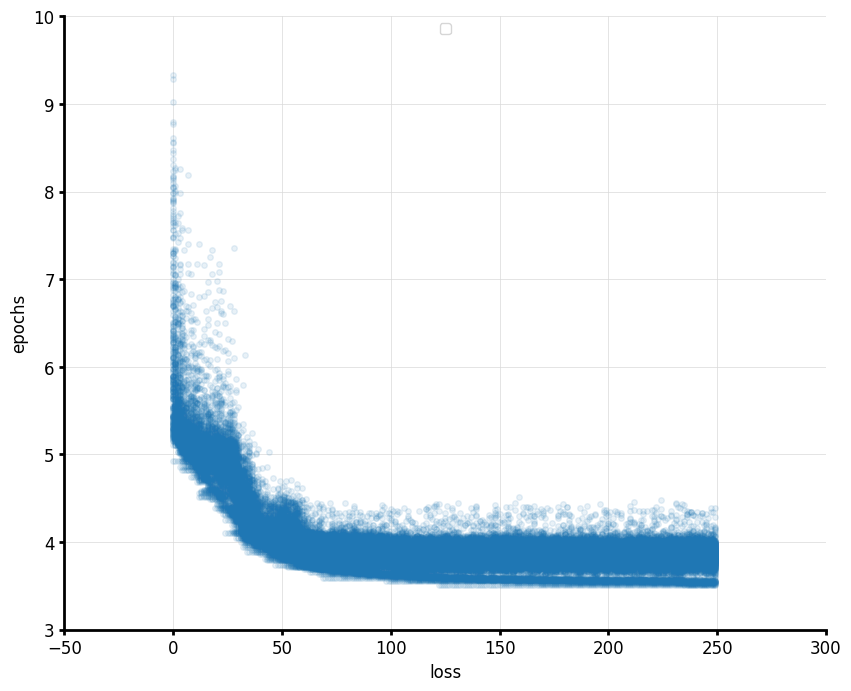

In [47]:
plt.plot( epochs, np.log(result['dump']['dump']['loss']) , '.', alpha=0.1)
plt.plot()
plt.xlabel('loss')
plt.ylabel('epochs')
#plt.xlim(3.5,3.8)
#plt.ylim(500, 600)
plt.legend()

In [9]:
from pypoptim.algorythm.ga import GA
from ina_model import InaModel
from solmodel import SolModel
from pypoptim.algorythm.ga.mutation import cauchy_mutation

In [10]:
import seaborn as sns

In [11]:
config

{'n_organisms': 256,
 'n_elites': 16,
 'n_generations': 5000,
 'output_folder_name': '../../results/ina/',
 'loss': 'RMSE',
 'columns_control': ['I_out'],
 'columns_model': ['I_out'],
 'column_stim_protocol': ['v'],
 'filename_so': '../../src/model_ctypes/ina/ina.so',
 'filename_legend_states': '../../src/model_ctypes/ina/legend_states.csv',
 'filename_legend_constants': '../../src/model_ctypes/ina/legend_constants.csv',
 'filename_legend_algebraic': '../../src/model_ctypes/ina/legend_algebraic.csv',
 'filename_protocol': '../../data/protocols/protocol_trace.csv',
 'filename_initial_state_protocol': '../../data/protocols/protocol_initial_state.csv',
 'experimental_conditions': {'common': {'params': {'c_p': {'bounds': [0.1, 10],
     'gamma': 0.15,
     'is_multiplier': True},
    'c_m': {'bounds': [0.1, 10], 'gamma': 0.15, 'is_multiplier': True},
    'a0_m': {'bounds': [0.1, 10], 'gamma': 0.15, 'is_multiplier': True},
    'b0_m': {'bounds': [0.1, 10], 'gamma': 0.15, 'is_multiplier': Tr

In [12]:
filename_so = "../../src/model_ctypes/ina/ina.so"
# filename_so = config['runtime']['filename_so_abs']
model = InaModel(filename_so)
SolModel.model = model
SolModel.config = config
#config['runtime']['gammas']+=1


In [93]:
dirname = '../../src/model_ctypes/ina/'

C = pd.read_csv(os.path.join(dirname, "legend_constants.csv"), index_col='name')
column_names = C.T.columns[:-2]

In [114]:

gammas = np.zeros_like(config['runtime']['gammas'])
gammas+=1
ga_optim = GA(SolModel,
              config['runtime']['bounds'],
              #config['runtime']['gammas'],
              gammas,
              config['runtime']['mask_multipliers'],
              crossover_rate=0
              )
sol = ga_optim.generate_solution()
print('gammas = ',gammas)

genes_initial = sol.x
genes_transformed = ga_optim._transform_genes(genes_initial)
bounds_transformed = ga_optim._bounds_transformed

result = []
for _ in range(25600):
    genes_mutated = cauchy_mutation(genes=genes_transformed,
                                bounds=bounds_transformed, 
                                gamma = gammas,
                                        )

    genes = ga_optim._transform_genes_back(np.asfarray(genes_mutated))
    result.append(genes)
result = pd.DataFrame(result, columns=column_names)

gammas =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [115]:
gammas1 = np.zeros_like(config['runtime']['gammas'])
gammas1+=1
gammas1[:20]-=0.5

ga_optim1 = GA(SolModel,
              config['runtime']['bounds'],
              #config['runtime']['gammas'],
              gammas1,
              config['runtime']['mask_multipliers'],
              crossover_rate=0
              )
sol1 = ga_optim1.generate_solution()
print('gammas = ',gammas1)

genes_initial1 = sol1.x
genes_transformed1 = ga_optim._transform_genes(genes_initial1)
bounds_transformed1 = ga_optim._bounds_transformed

result1 = []
for _ in range(25600):
    genes_mutated1 = cauchy_mutation(genes=genes_transformed1,
                                bounds=bounds_transformed1, 
                                gamma = gammas1,
                                        )

    genes1 = ga_optim._transform_genes_back(np.asfarray(genes_mutated1))
    result1.append(genes1)
result1 = pd.DataFrame(result1, columns=column_names)

gammas =  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 1.  1.  1.  1.  1.  1.  1.  1. ]


/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

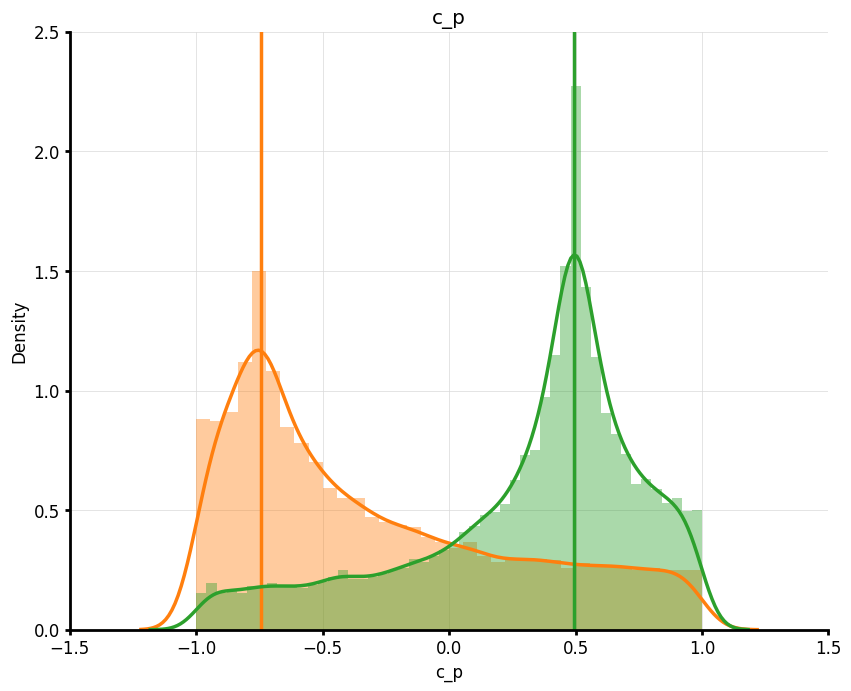

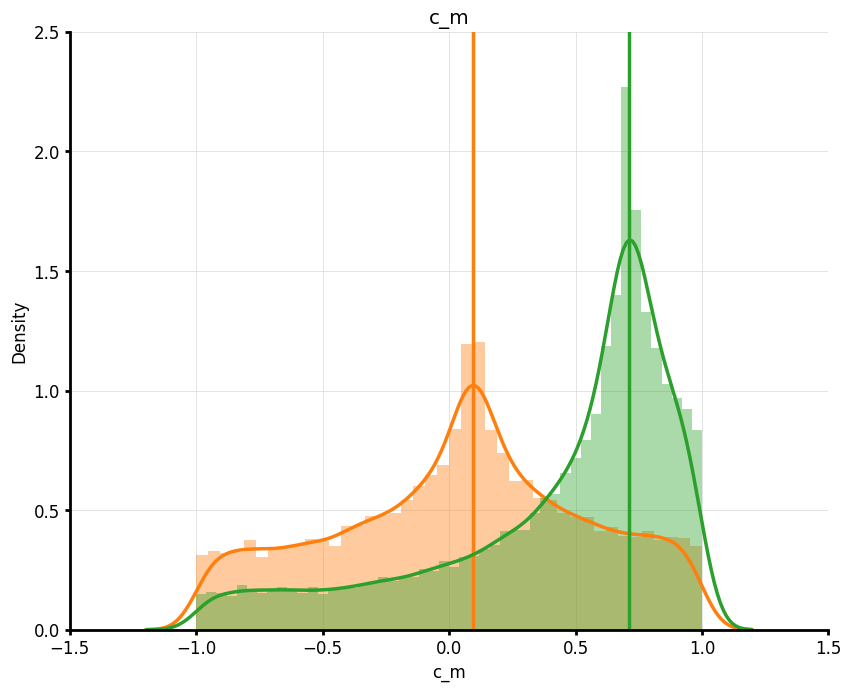

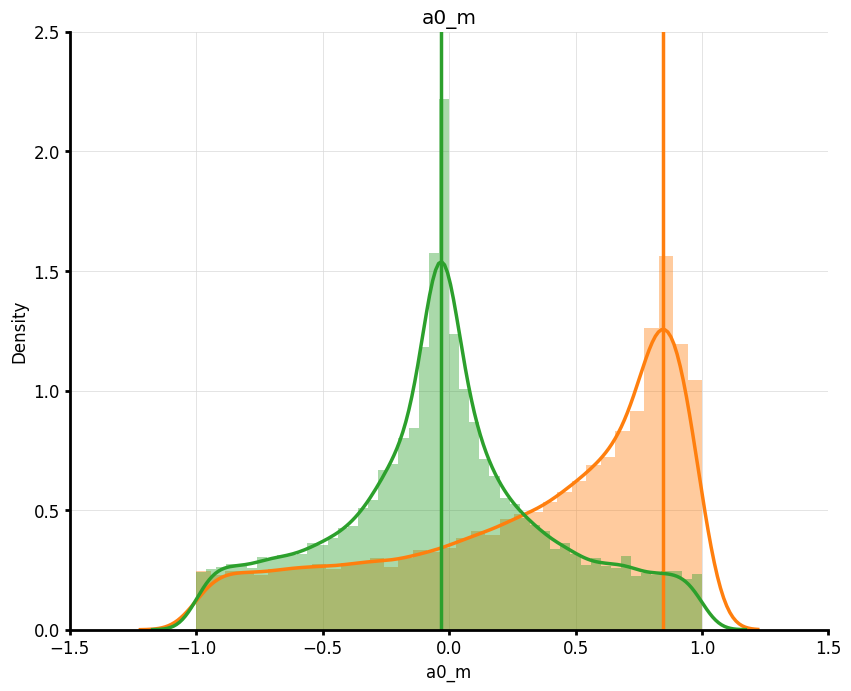

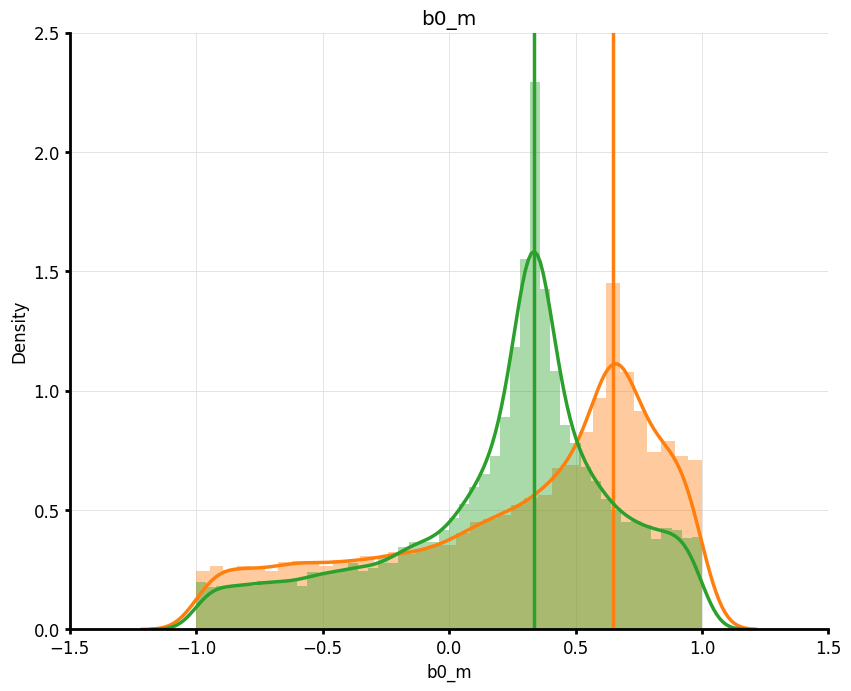

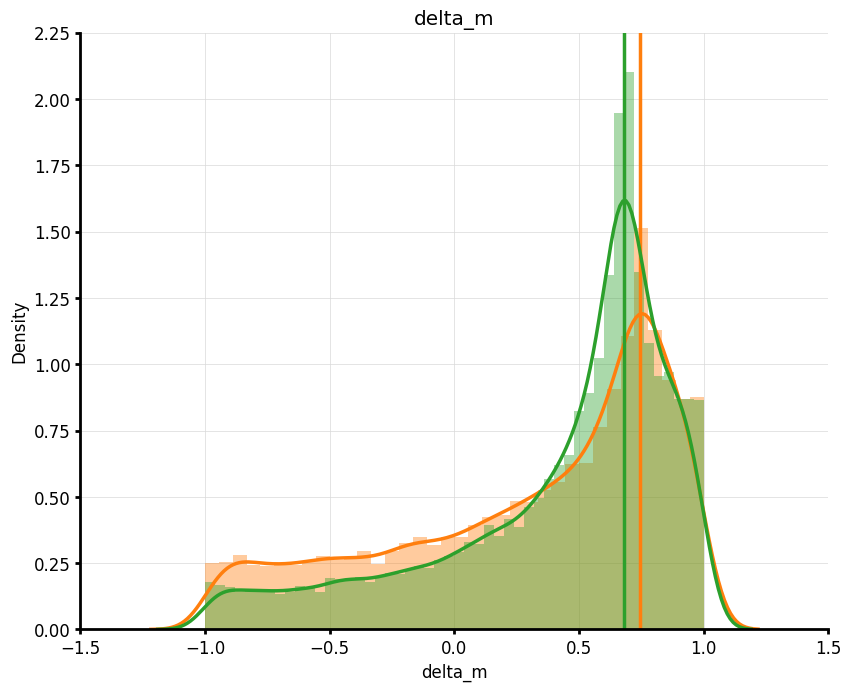

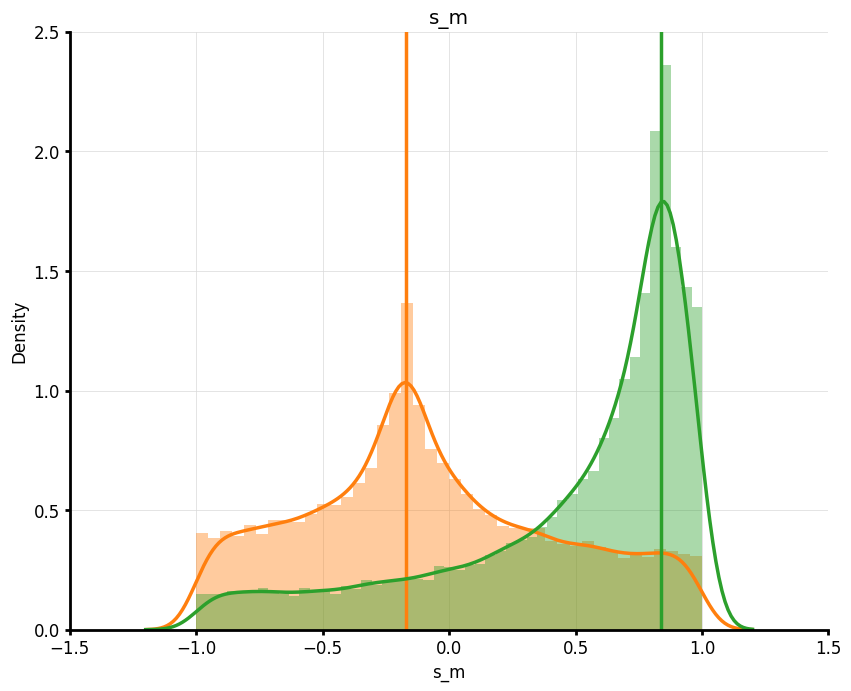

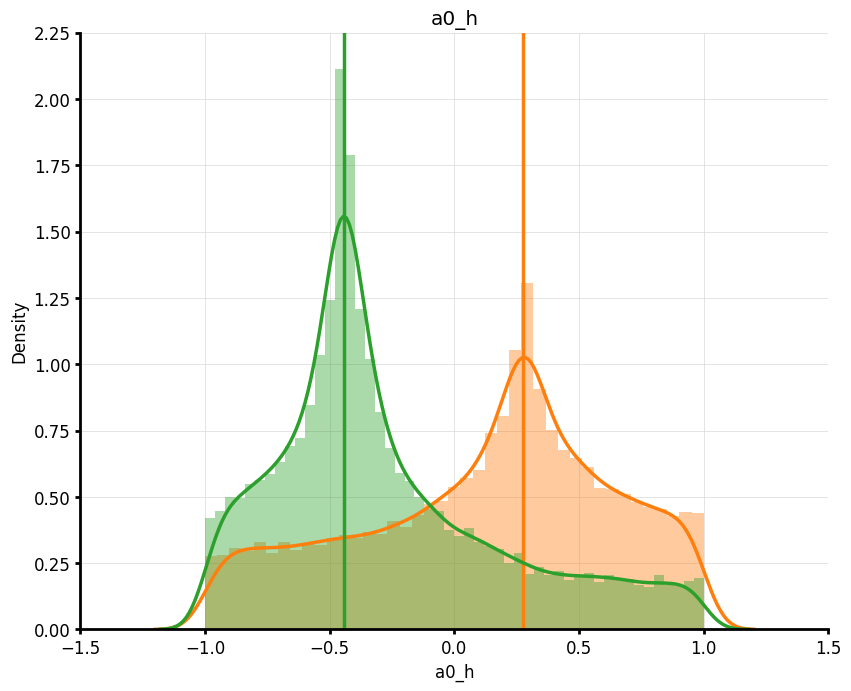

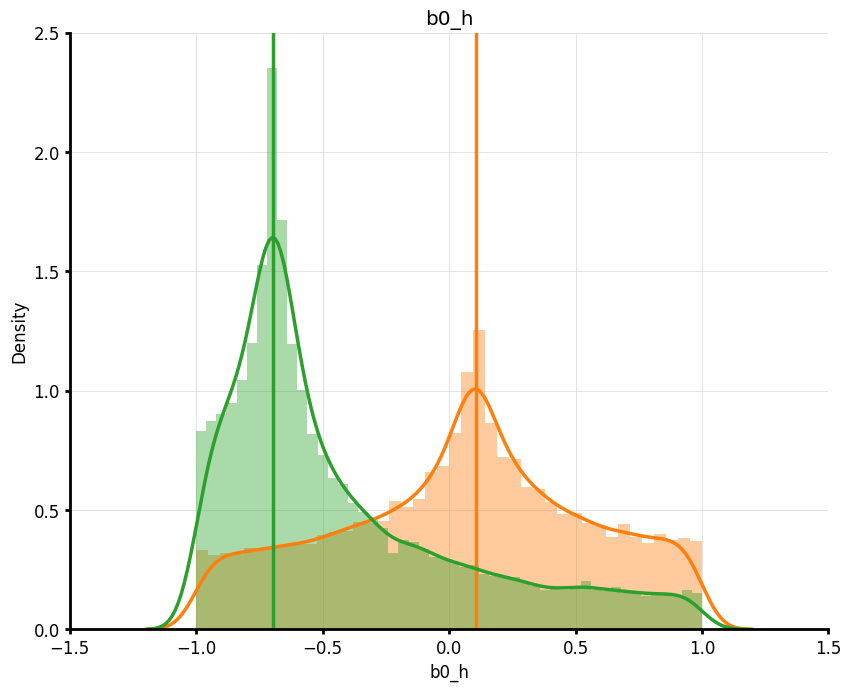

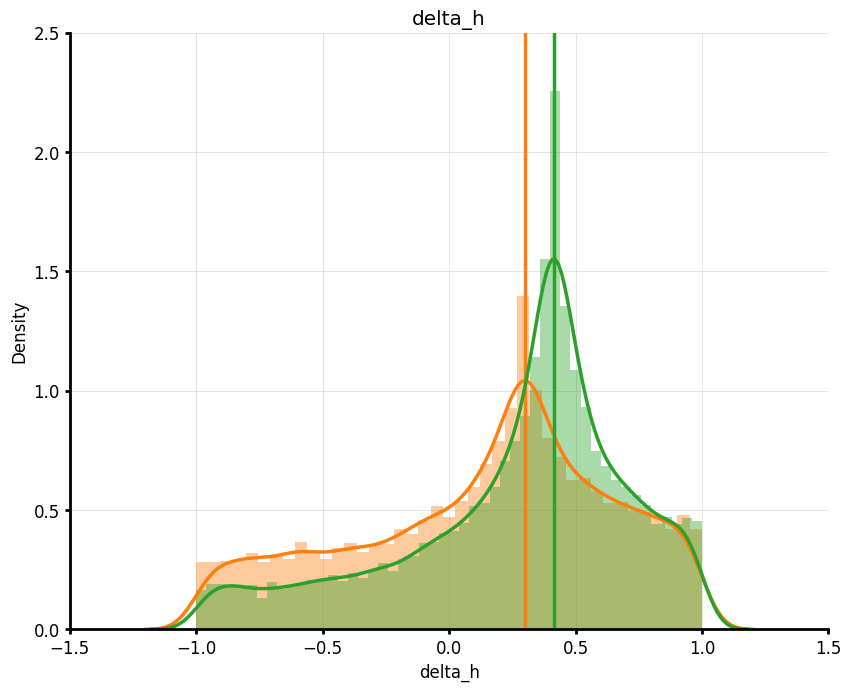

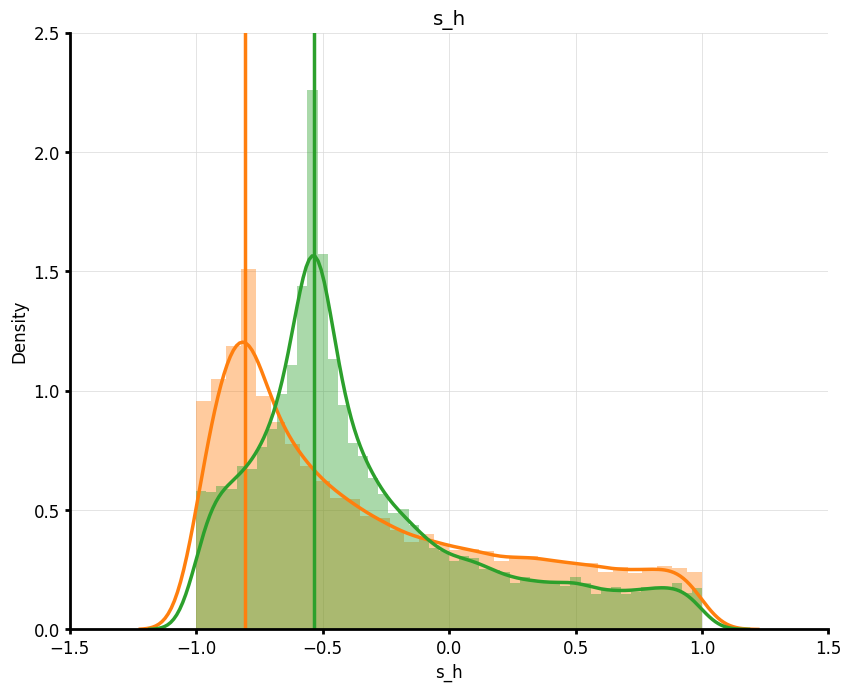

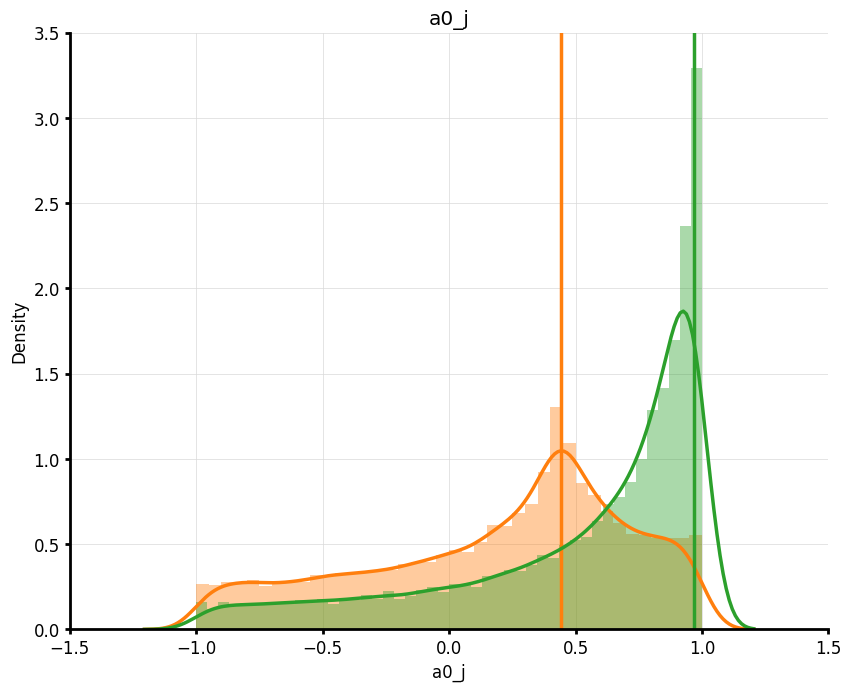

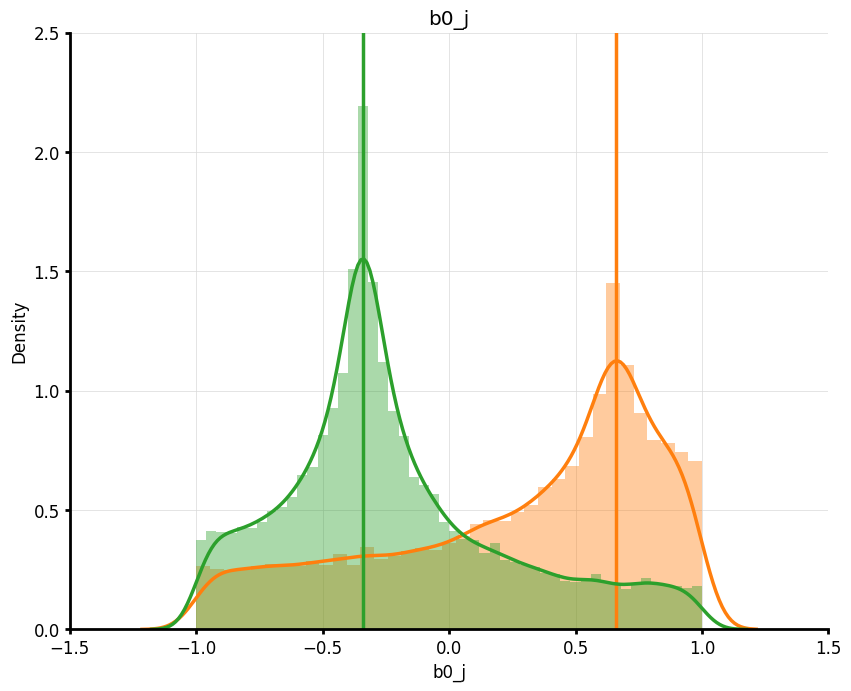

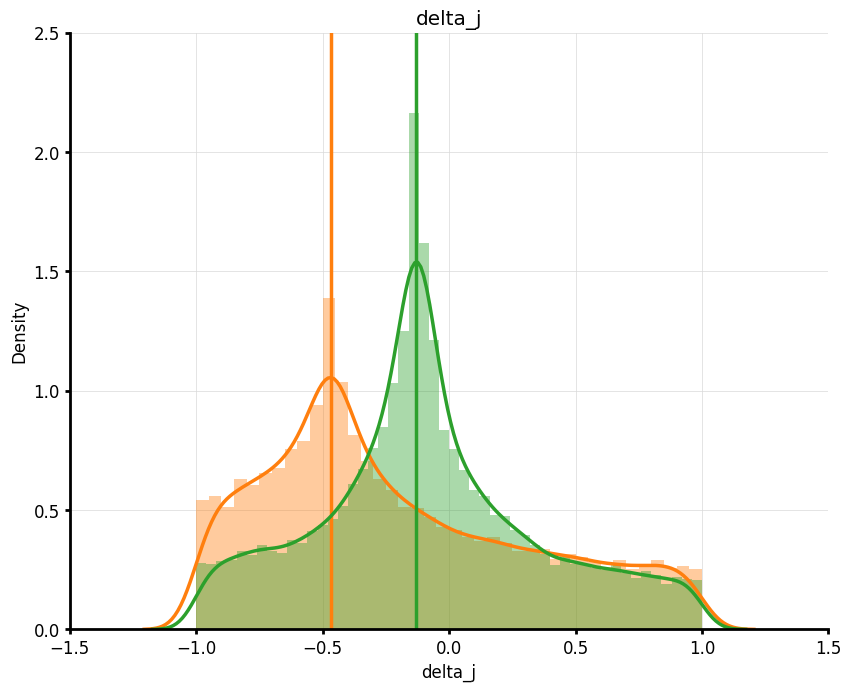

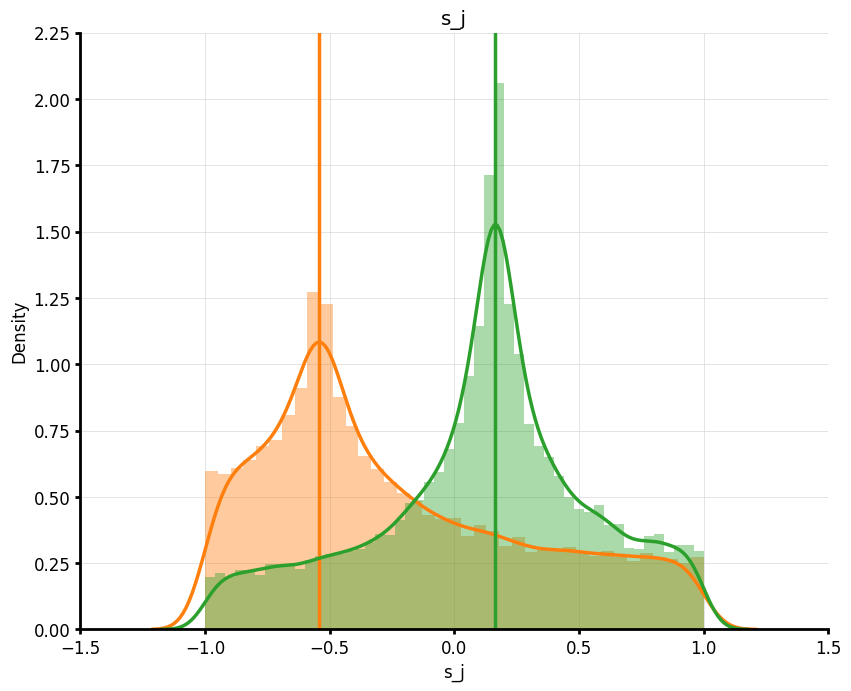

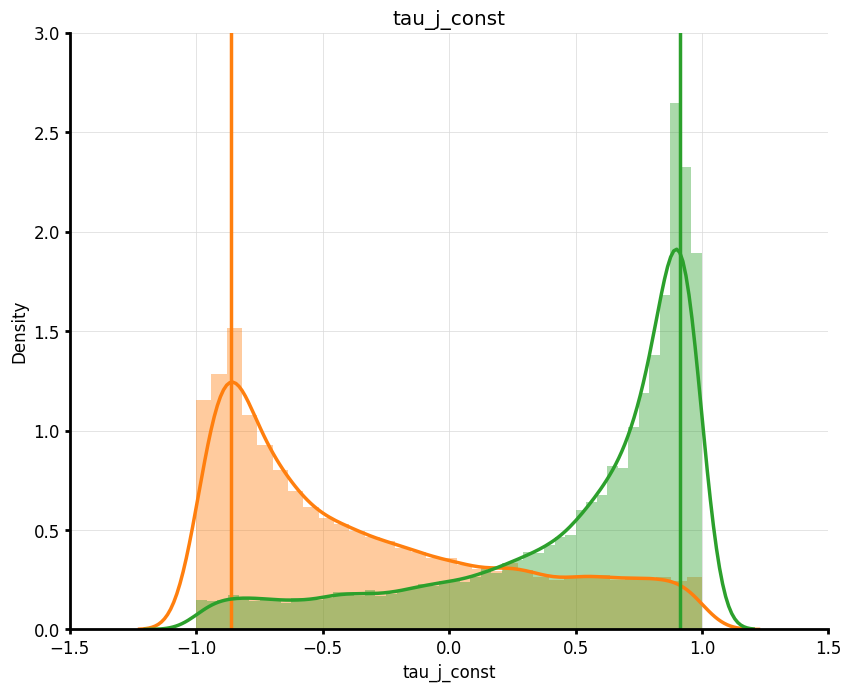

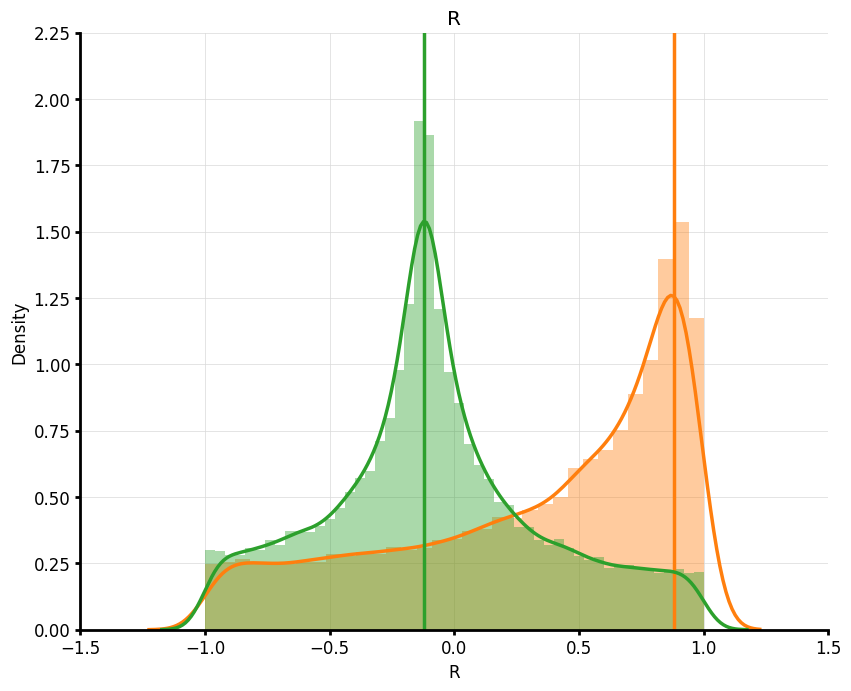

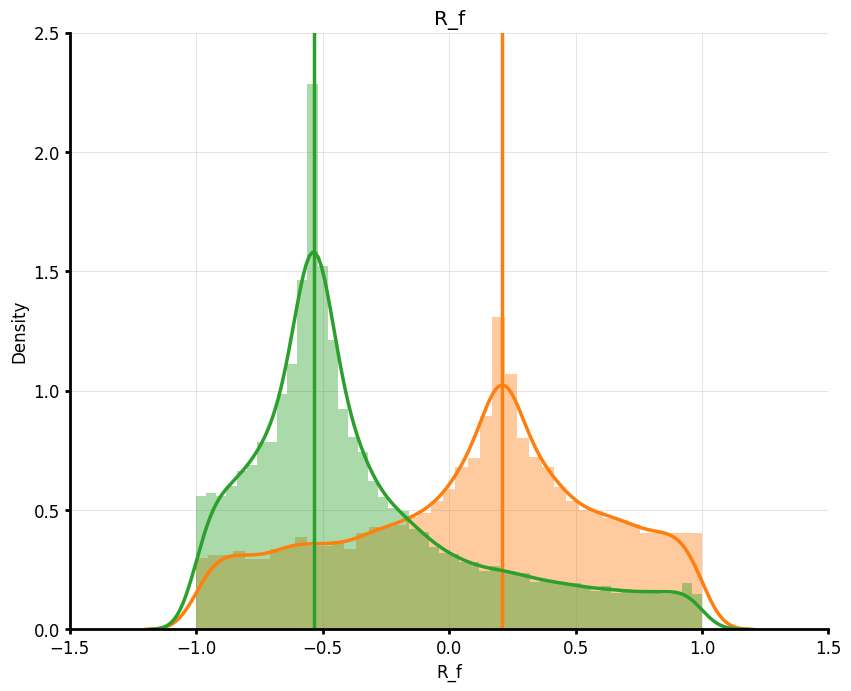

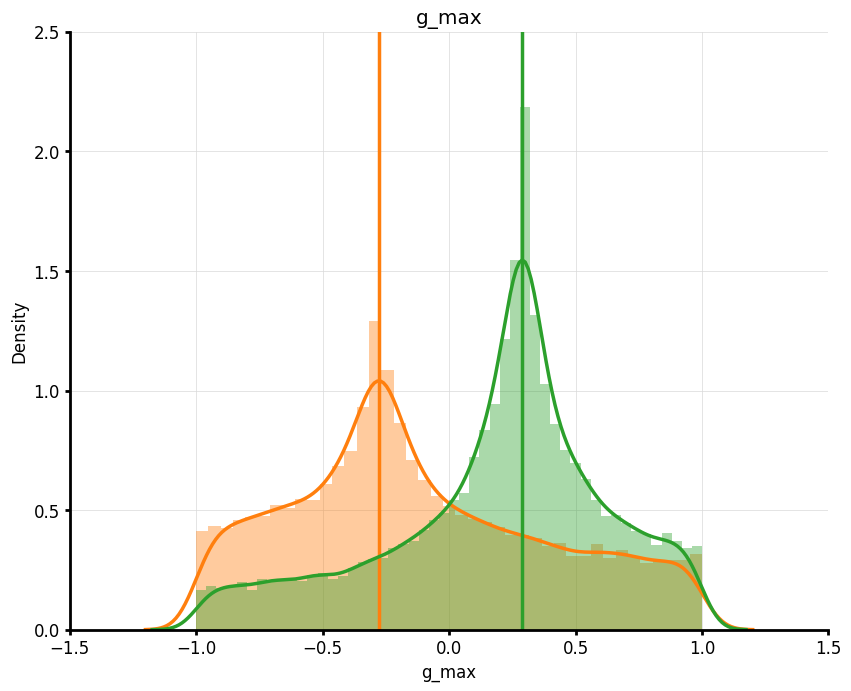

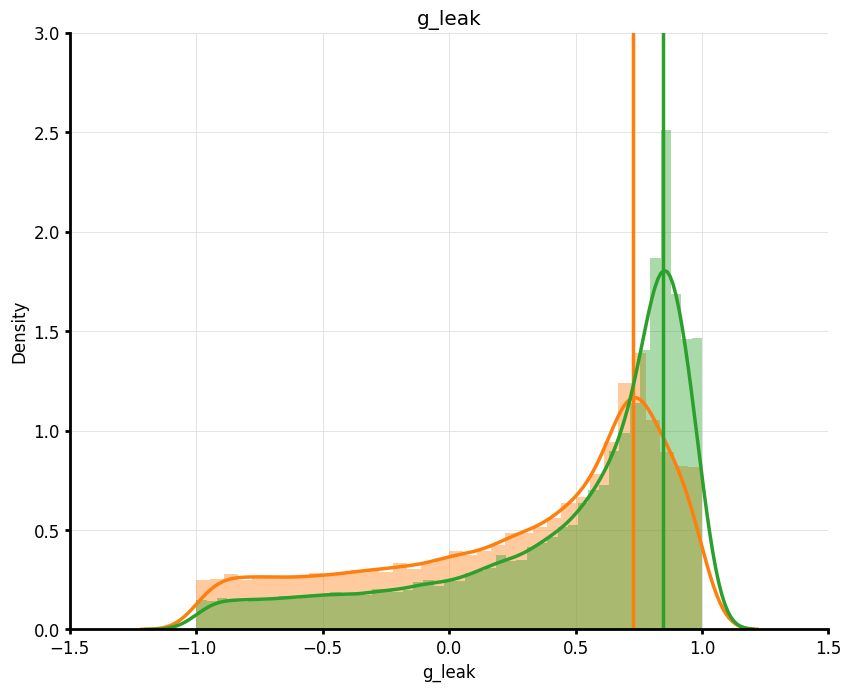

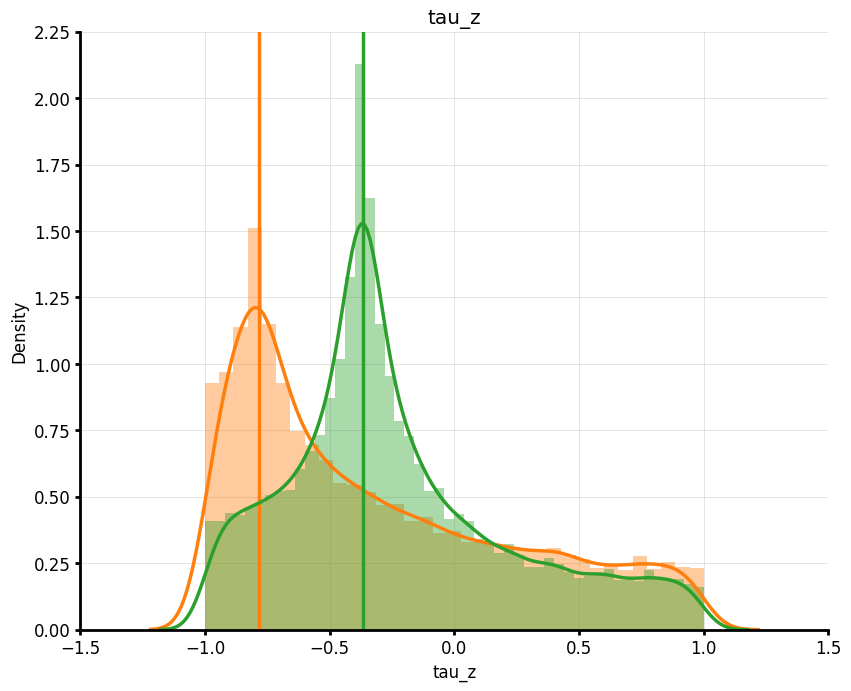

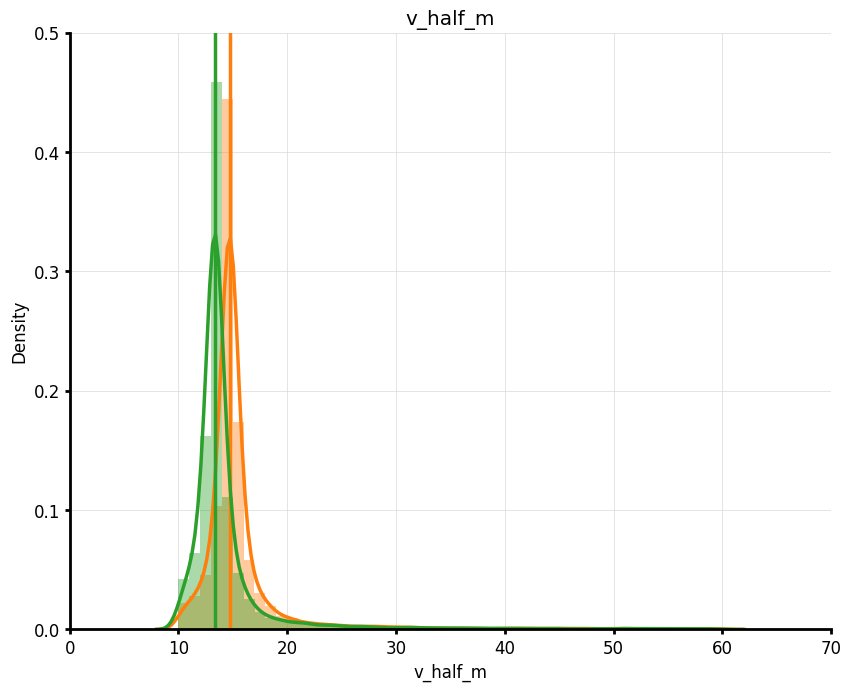

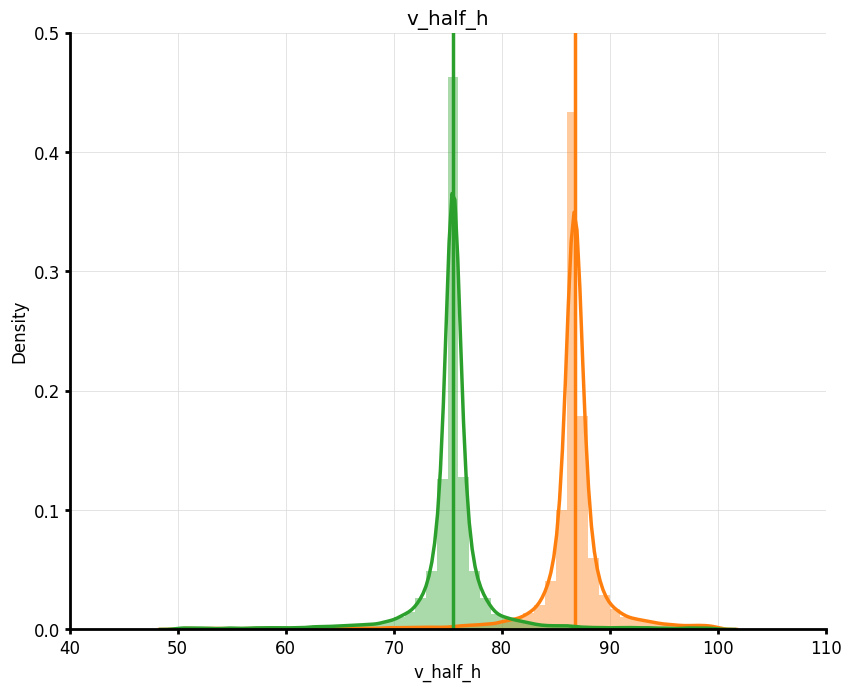

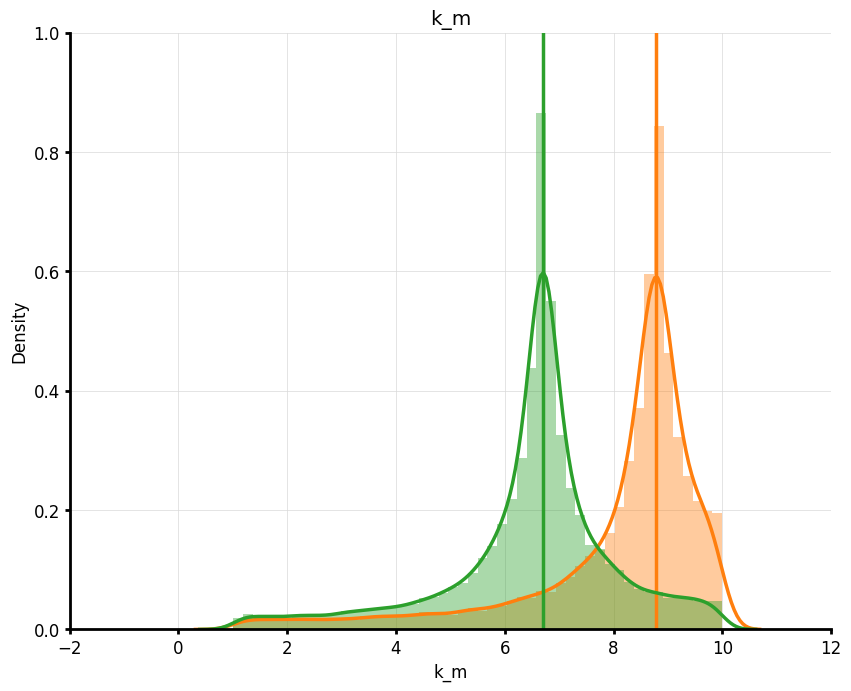

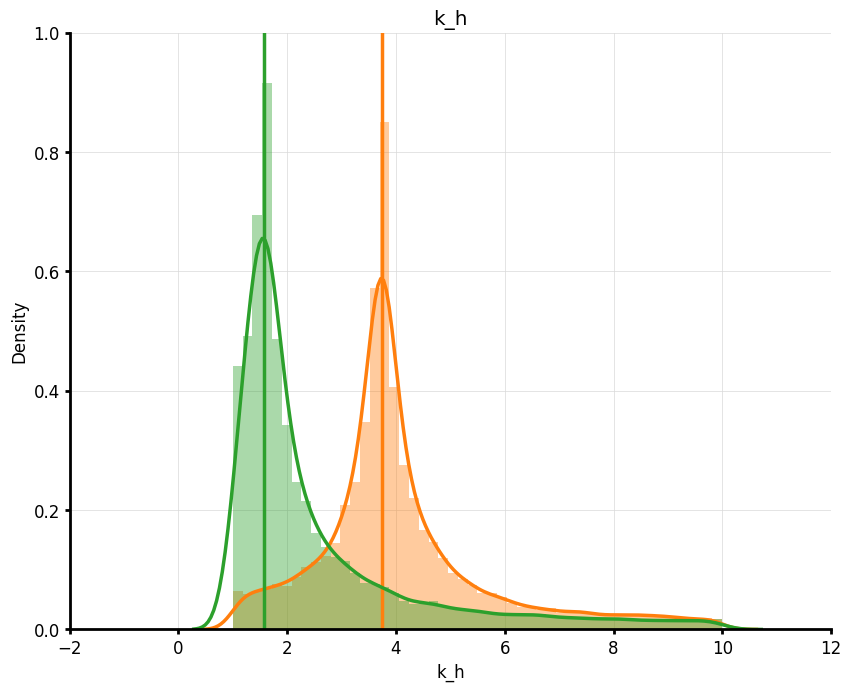

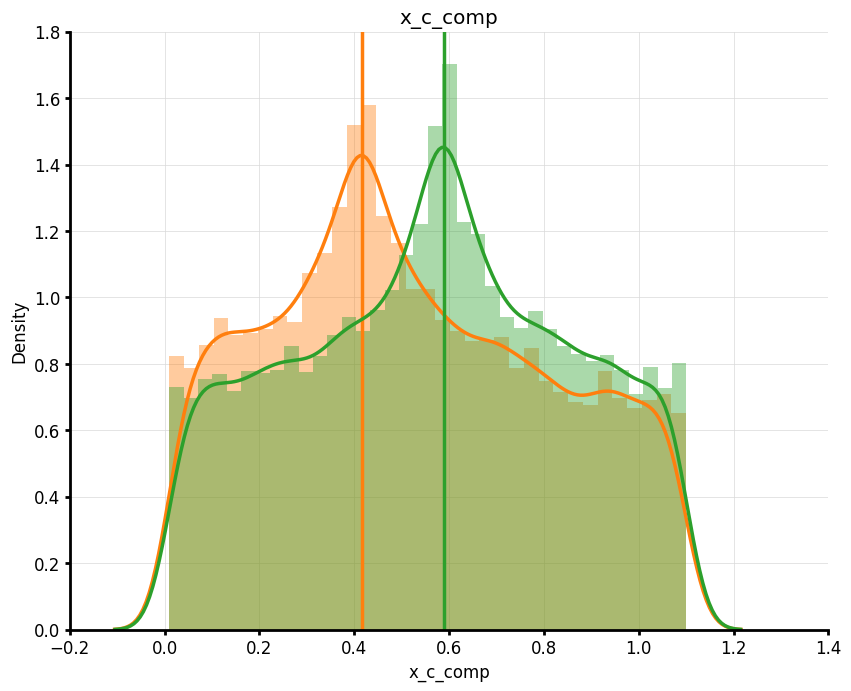

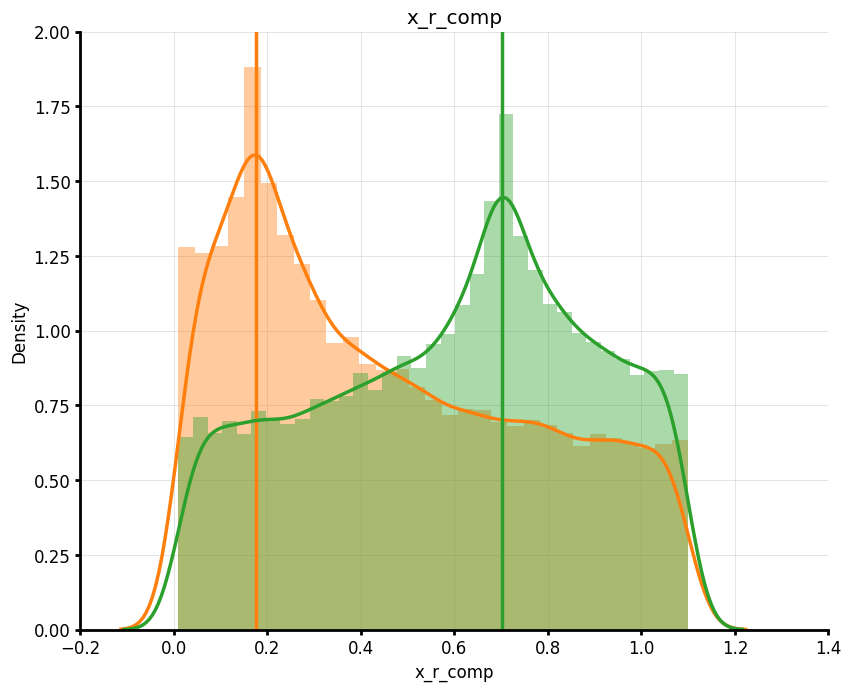

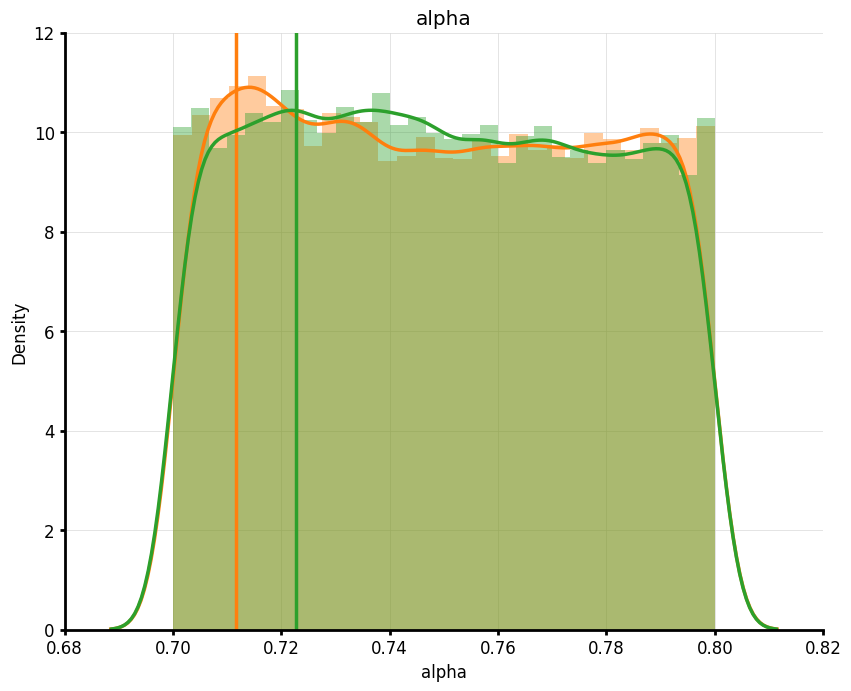

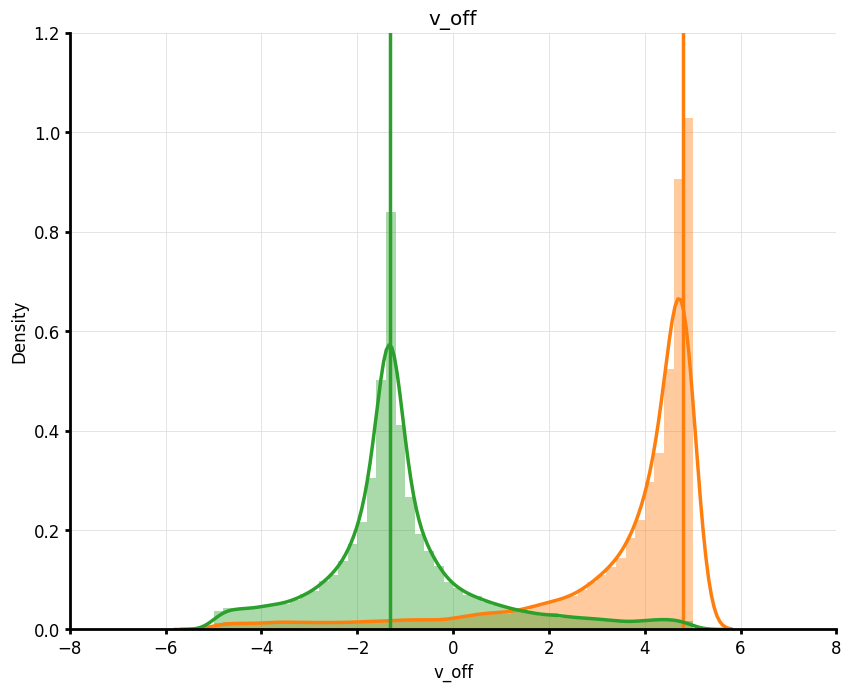

In [116]:
for k in range(20):
    plt.figure()
    sns.distplot(np.log10(result[column_names[k]]), color='C1')
    plt.axvline(np.log10(genes_initial[k]), color='C1')
    
    sns.distplot(np.log10(result1[column_names[k]]), color='C2')
    plt.axvline(np.log10(genes_initial1[k]), color='C2')
    plt.title(column_names[k])

for k in range(20,28):
    plt.figure()
    sns.distplot(result[column_names[k]], color='C1')
    plt.axvline(genes_initial[k], color='C1')
    
    sns.distplot(result1[column_names[k]],color='C2')
    plt.axvline(genes_initial1[k], color='C2')
    plt.title(column_names[k])

<ipython-input-17-6beea4687118>:1: RuntimeWarning: invalid value encountered in log10
  sns.distplot(np.log10(result))
/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2589: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/nik/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/nik/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<AxesSubplot:>

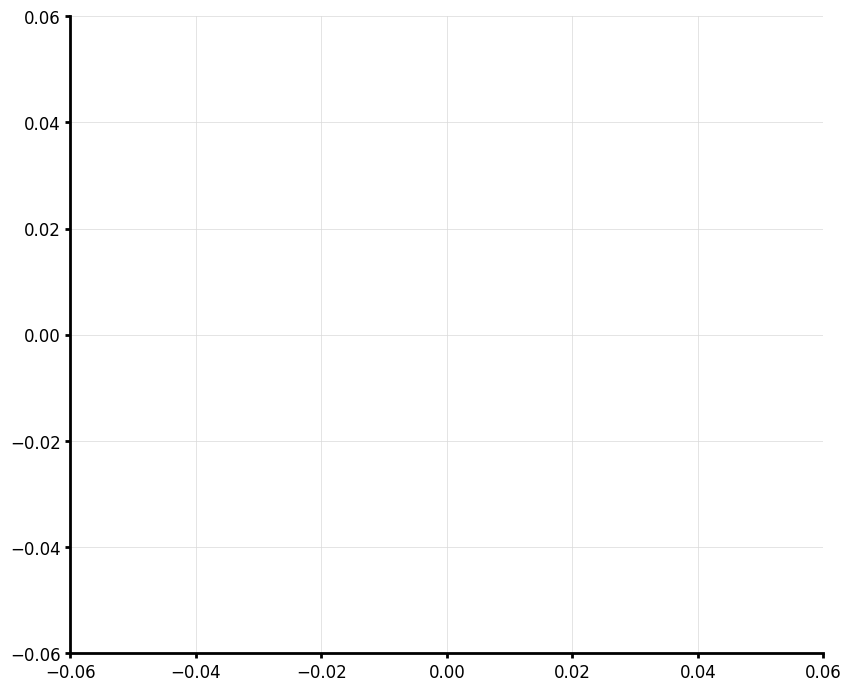

In [17]:
sns.distplot(np.log10(result))

In [14]:
generations = np.arange(n_generations)

No handles with labels found to put in legend.


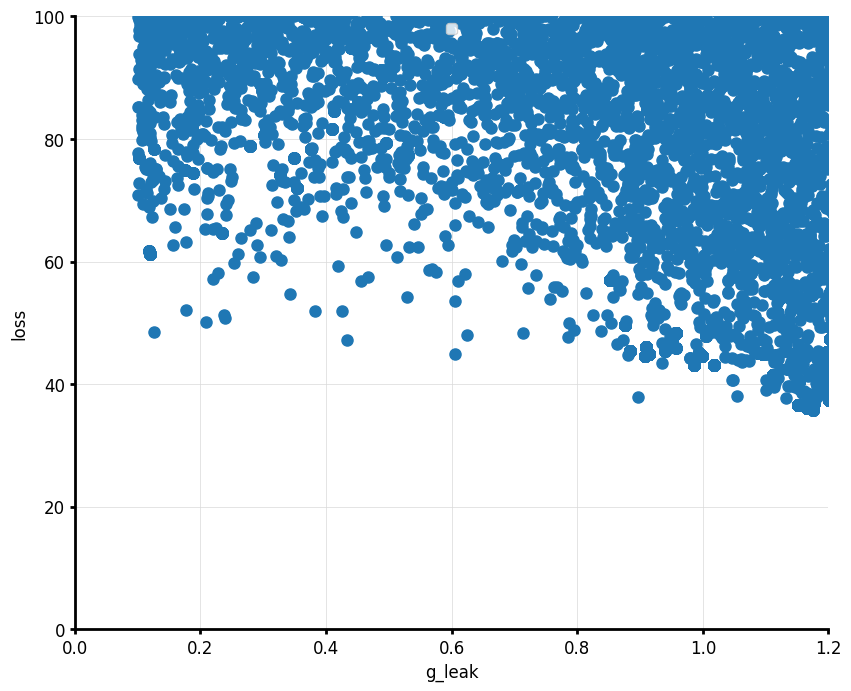

In [28]:
plt.scatter(result['dump']['dump']['genes'][18::28],result['dump']['dump']['loss'] )
plt.xlabel('g_leak')
plt.ylabel('loss')
plt.xlim(0, 1.2)
plt.ylim(0,100)
plt.legend()

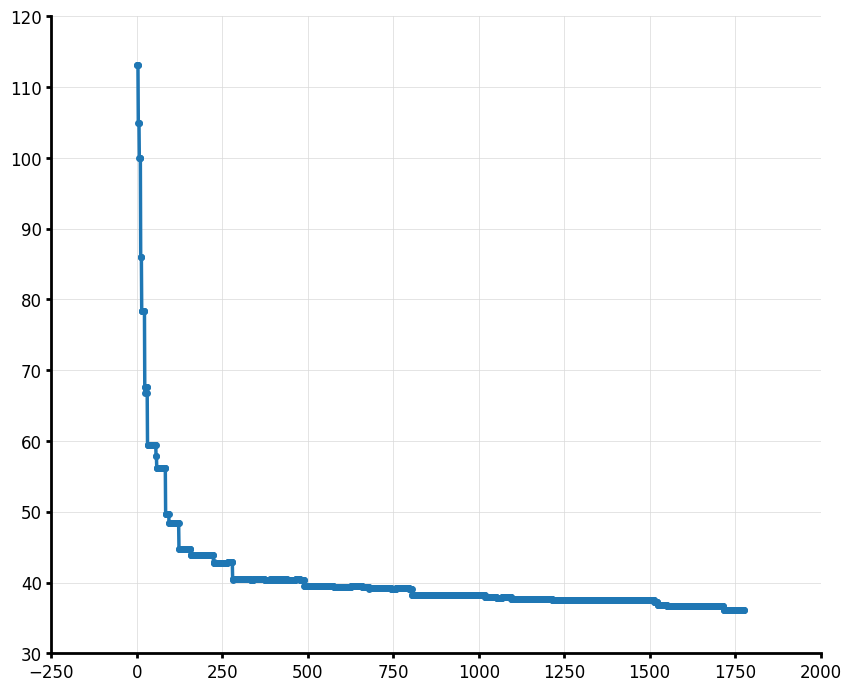

In [29]:
loss = result['dump']['best']['loss']
plt.plot(loss, '.-')

In [ ]:
result = collect_results(case, dirname_results, dump_keys=['best', 'dump'])

In [ ]:
dump_genes = pd.DataFrame(result['dump']['best']['genes'].reshape(-1, len(sol_best)),
                          columns=config['runtime']['m_index'])
dump_genes

In [ ]:
plt.scatter(dump_genes['common']['g_leak'],loss)
plt.ylabel('loss')
plt.xlabel('g_leak')
plt.legend()

# Recreate solution

In [13]:
sys.path.append('src/model')
from ina_model import InaModel
from solmodel import SolModel

In [14]:
C.T.columns


AttributeError: 'Series' object has no attribute 'columns'

In [15]:
sol_best['common']['g_leak'] =1

In [16]:
sol_best1 = sol_best.copy()
sol_best1

ec_name  g_name     
common   c_p             0.856344
         c_m             1.340119
         a0_m            0.230524
         b0_m            8.232682
         delta_m         2.961568
         s_m             1.003738
         a0_h            1.153501
         b0_h            3.387604
         delta_h         1.920495
         s_h             0.546435
         a0_j            0.368656
         b0_j            0.430863
         delta_j         0.115069
         s_j             0.138986
         tau_j_const     0.175007
         R               0.445268
         R_f             6.289404
         g_max           2.553292
         g_leak          1.000000
         tau_z           0.395523
         v_half_m       23.921037
         v_half_h       85.393364
         k_m             5.111284
         k_h             3.477428
         x_c_comp        0.114182
         x_r_comp        0.994091
         alpha           0.741560
trace    v_off           3.092132
Name: 0, dtype: float64

In [22]:
config['runtime']

{'config_path': '/home/nik/Documents/comparison/INa_full_trace/pypoptim/configs/configs_pipette',
 'filename_so_abs': '/home/nik/Documents/comparison/INa_full_trace/src/model_ctypes/ina_pipette/ina.so',
 'sha': '48eac0863d7273f57fd6d390978be70194f3e86e',
 'genes_dict': {'common': {'c_p': {'bounds': [0.1, 10],
    'gamma': 0.004,
    'is_multiplier': True},
   'c_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
   'a0_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
   'b0_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
   'delta_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
   's_m': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
   'a0_h': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
   'b0_h': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
   'delta_h': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_multiplier': True},
   's_h': {'bounds': [0.1, 10], 'gamma': 0.004, 'is_m

In [28]:
filename_so = "../../src/model_ctypes/ina_pipette/ina.so"
model = InaModel(filename_so)

SolModel.model = model
SolModel.config = config.copy()

sol = SolModel(x=C[:28])

In [81]:
len(sol.data['phenotype']['trace']) ==len(art_data)

True

In [80]:
len(art_data)

100000

In [46]:
sol.update()

In [21]:
sol

Solution = {
    x    = [ 4.502963e-12  2.473016e-11  2.736956e+03  7.135904e+01  2.061570e+01
  9.306083e+00  4.604052e-01  5.038082e+02  1.523480e+01  2.196405e+01
  4.475461e-01  2.061333e+04  4.115303e+00  1.673159e+02  7.794313e-04
  2.494677e+07  3.264214e+05  4.392204e+05  4.812443e-01  1.000340e-04
  2.435802e+01  5.969117e+01  5.666770e+00  5.507771e+00  9.929933e-02
  1.020000e+00  7.500000e-01 -2.000000e+00  1.800000e+01 -8.000000e+01],
    y    = None,
    data = {'phenotype': {}}
}

In [31]:
I_best = sol['phenotype']['trace']['I_out']

In [32]:
I = config['experimental_conditions']['trace']['phenotype']['I_out']
RMSE(I_best, I)

37.85671042519609

In [33]:
I = config['experimental_conditions']['trace']['phenotype']['I_out']
RMSE(I_best, I)

37.85671042519609

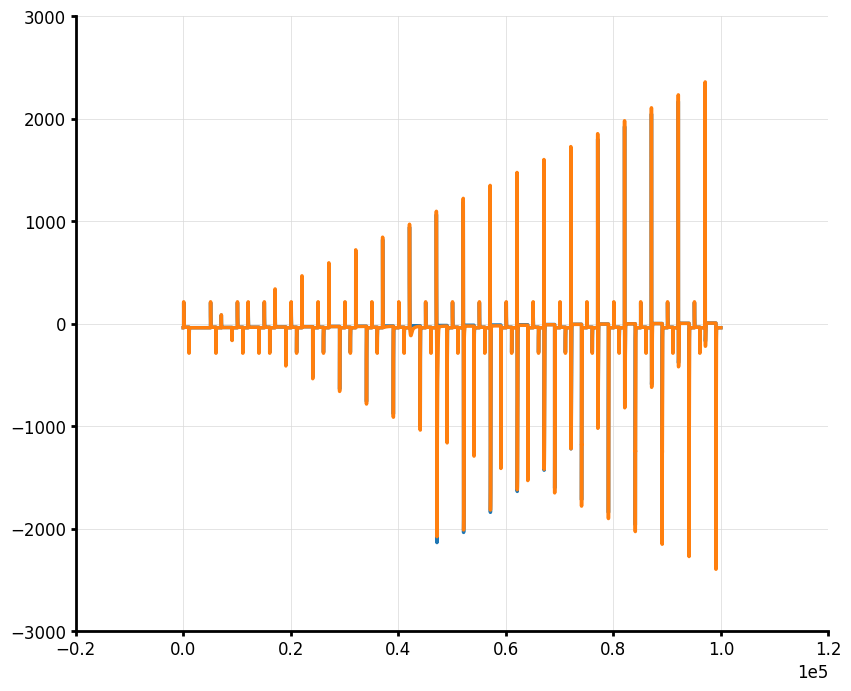

In [35]:
plt.plot(sol['phenotype']['trace']['I_out'])
plt.plot(art_data.I_out)

In [ ]:
np.

In [21]:
art_data = pd.read_csv('../../data/training/art_data_right_j.csv')

<ipython-input-61-8aa69ea2a990>:45: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


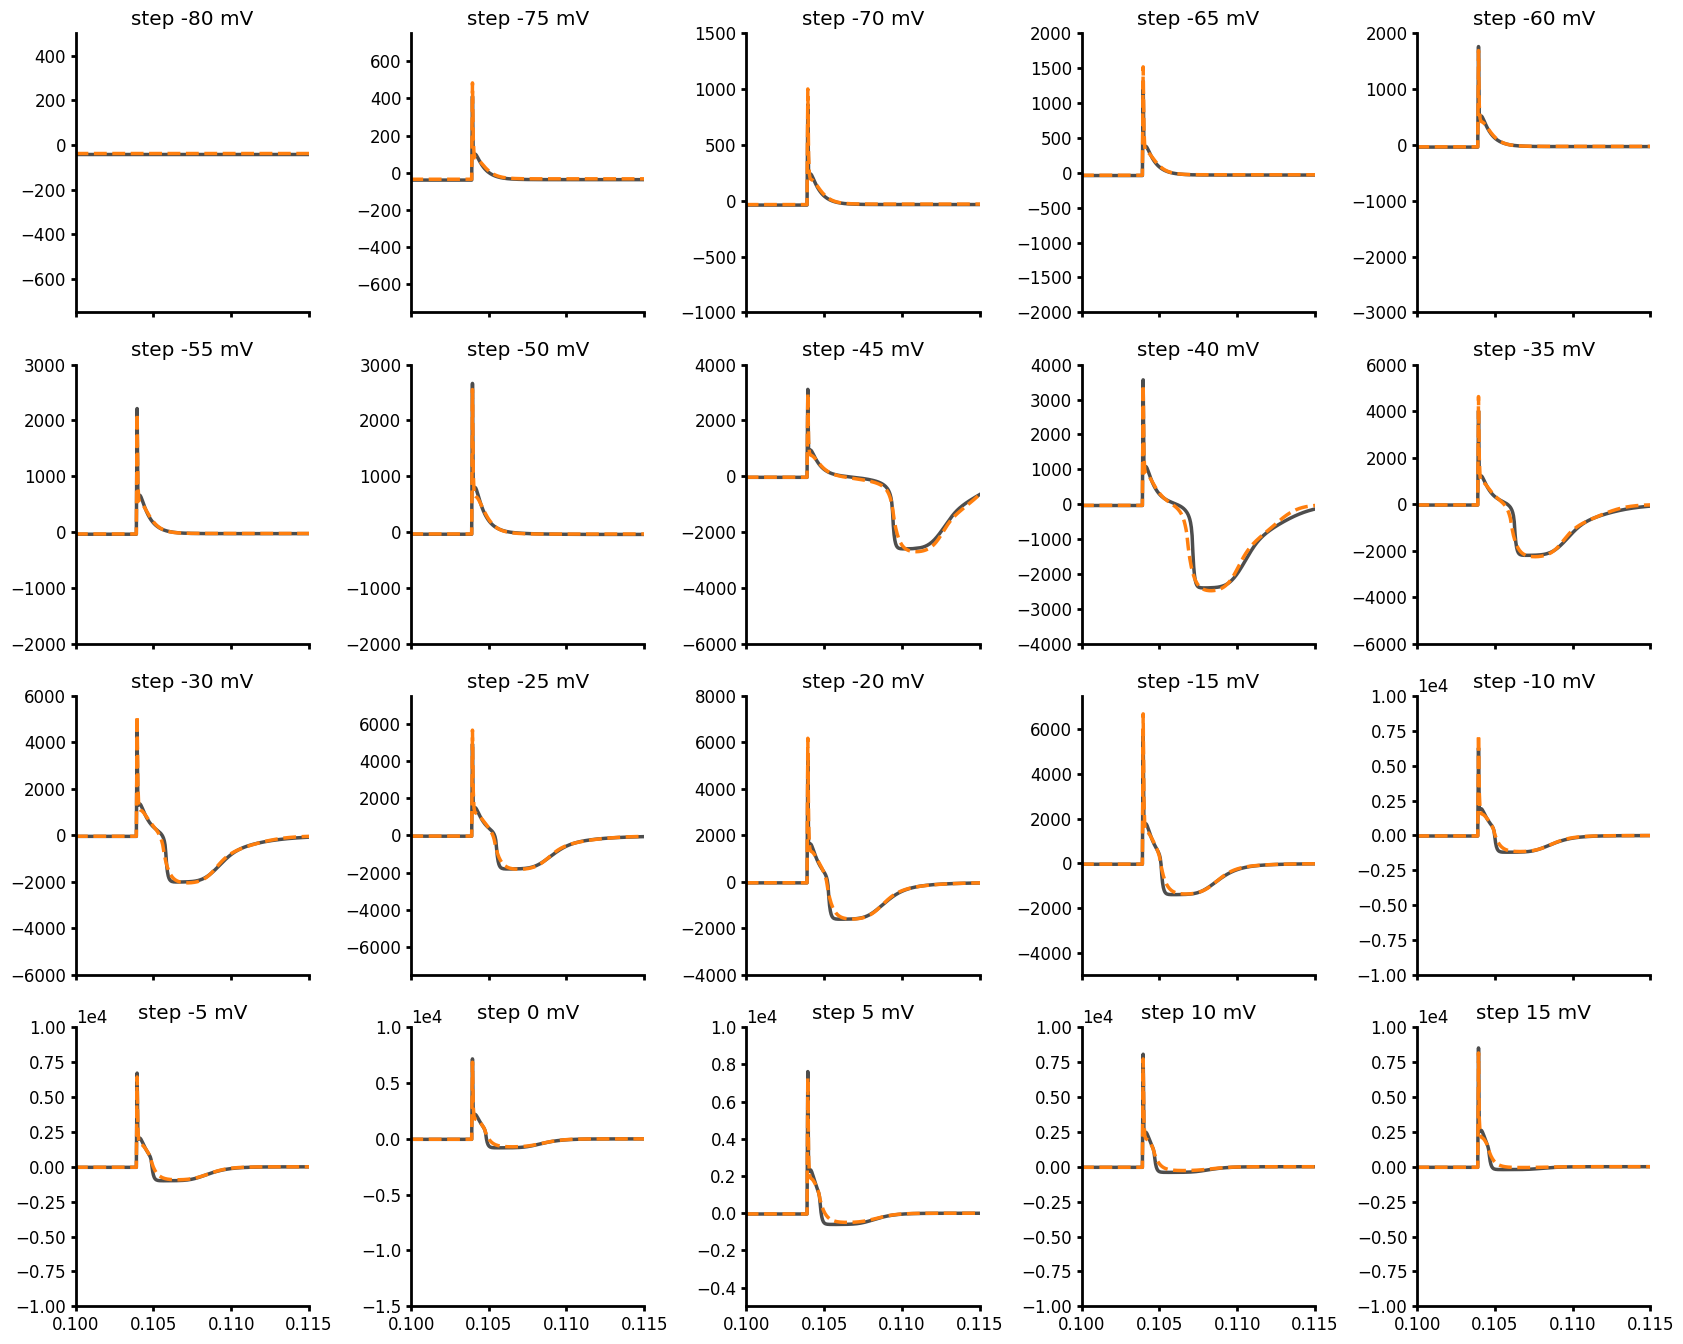

In [61]:
    #I_out = i.I_out#sol['phenotype']['trace']['I_out']
    I_out = best_phenotype
    real_data_all = art_data.I_out
    n_sections = 20
    split_indices = np.linspace(0, len(real_data_all), n_sections + 1).astype(int)

    nrows, ncols = 4, 5

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=plt.figaspect(nrows / ncols) * 2,
                             sharex=True)

    
    dt = 5e-5

    colors = ['0.3', 'C1']

    i_global = 0

    for i_row in range(nrows):
        for i_col in range(ncols):
            ax = axes[i_row, i_col]
            plt.sca(ax)

            i_start, i_end = split_indices[i_global], split_indices[i_global + 1]
            slice_current = slice(i_start, i_end)

            I_out_current = I_out[slice_current]
            data_current  = real_data_all[slice_current]
            t = np.arange(len(data_current)) * dt

            plt.plot(t, data_current, color=colors[0])
            plt.plot(t, I_out_current, "--", color=colors[1])#, lw=0.5,)

            plt.grid()

            step_value = -80 + 5 * i_global
            title = f'step {step_value} mV'
            plt.title(title)

            i_global += 1
            plt.xlim(0.1,0.115)
            #plt.ylim(-2000, 110)
            
    plt.tight_layout()
    
    
    
    #folder_save = "../../pictures/results/"
    #filename_prefix = ar[k].split('.')[0]
    #plt.title(filename_prefix)
    #plt.show()
    
    #filename_save = os.path.join(folder_save, f'{filename_prefix}_grid.png')
    filename_save = '../../pictures/results/art_data_n_256_best_16_epochs_1000_leak_1.png'
    #plt.savefig(filename_save, dpi=300)

In [36]:
#pd.DataFrame(np.array([art_data.t,i.I_out]).T, columns=['t', 'I_out']).to_csv('../../data/training/art_data_right_j_pipette.csv')

In [32]:
art_data

,Unnamed: 0,t,I_out
0,0,0.00000,-38.993896
1,1,0.00005,-38.993896
2,2,0.00010,-38.993896
3,3,0.00015,-38.993896
4,4,0.00020,-38.993896
...,...,...,...
99995,99995,4.99975,-38.993892
99996,99996,4.99980,-38.993892
99997,99997,4.99985,-38.993892
99998,99998,4.99990,-38.993892


In [41]:
np.all([3,46]==[3,46])

True

In [33]:
dump_genes.iloc[-1]

ec_name  g_name     
common   c_p             3.653771
         c_m             1.691761
         a0_m            2.183544
         b0_m            0.923361
         delta_m         0.647492
         s_m             4.952795
         a0_h            9.828578
         b0_h            1.099444
         delta_h         0.602708
         s_h             8.976248
         a0_j            0.625575
         b0_j            0.147311
         delta_j         0.811035
         s_j             1.034767
         tau_j_const     1.282862
         R               1.070311
         R_f             2.210616
         g_max           9.539465
         g_leak          0.119862
         tau_z           0.948702
         v_half_m       23.882189
         v_half_h       83.186072
         k_m             5.042149
         k_h             3.179943
         x_c_comp        0.157672
         x_r_comp        1.036790
         alpha           0.795904
trace    v_off          -3.450192
Name: 999, dtype: float64

In [37]:
art_data

0       -39.231662
1       -39.231662
2       -39.231662
3       -39.231662
4       -39.231662
           ...    
99995   -39.231661
99996   -39.231661
99997   -39.231661
99998   -39.231661
99999   -39.231661
Name: I_out, Length: 100000, dtype: float64

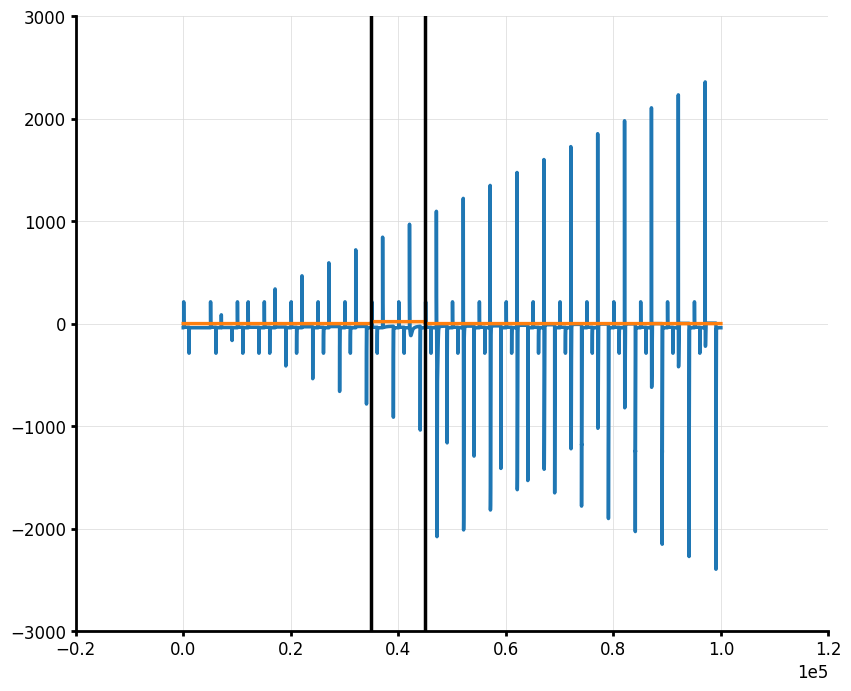

In [6]:
start = int(len(art_data.I_out)*7/20)
end = int(len(art_data.I_out)*9/20)
weight = np.zeros_like(art_data.I_out)
weight+=1
weight[start:end]*= 20
plt.plot(art_data.I_out)
plt.plot(weight)
plt.axvline(start, color = 'k')
plt.axvline(end, color = 'k')


In [7]:
W = pd.DataFrame(np.array([art_data.t.values, weight]).T, columns=['t','w'])
W.to_csv('../../data/sample_weights/weight_20_for_30_and_35_mV.csv')

In [8]:
pd.read_csv('../../data/sample_weights/weight_20_for_30_and_35_mV.csv').w

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
99995    1.0
99996    1.0
99997    1.0
99998    1.0
99999    1.0
Name: w, Length: 100000, dtype: float64